## Step 1:
- 📦 **Import necessary libraries**: Import key libraries like NumPy, pandas, xgboost, and others for data processing, machine learning models, and evaluation.
- 📊 **Set display options for pandas**: Configure pandas settings to show all columns, prevent line breaks in DataFrame, and allow full content in columns.
- 📂 **Load dataset**: Load the dataset from a CSV file into a pandas DataFrame (`df_concat`) for further processing and analysis.


In [ ]:
# Necessary libraries

import numpy as np  # NumPy: for handling arrays and performing mathematical operations
import pandas as pd  # pandas: for handling tabular data, such as DataFrames
import xgboost as xgb  # xgboost: for the XGBoost boosting algorithm
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV  # For splitting the data, cross-validation, and hyperparameter tuning
from sklearn.svm import SVR  # Support Vector Regression (SVR): for regression using support vector machines
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor: for boosting-based regression models
from sklearn.neighbors import KNeighborsRegressor  # KNeighborsRegressor: for regression based on the nearest neighbors algorithm
from sklearn.preprocessing import StandardScaler  # StandardScaler: for standardizing or normalizing features
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer  # Metrics to evaluate model performance
import statsmodels.api as sm  # statsmodels: for statistical models such as Ordinary Least Squares (OLS) regression and time series analysis
from joblib import dump  # joblib: for saving the trained models to disk
import matplotlib.pyplot as plt  # matplotlib: for creating visualizations like plots and charts
import seaborn as sns  # seaborn: for creating more advanced and aesthetically pleasing visualizations
from sklearn.impute import SimpleImputer  # SimpleImputer: for handling missing data in the dataset
from sklearn.linear_model import LinearRegression  # LinearRegression: for basic linear regression model


In [ ]:
# Set display options for DataFrame columns
pd.set_option('display.max_columns', None)  # Set to None to display all columns without limitation
pd.set_option('display.max_colwidth', None)  # Do not limit the width of column content
pd.set_option('display.expand_frame_repr', False)  # Prevent pandas from breaking the DataFrame into multiple lines


In [ ]:
# Load the dataset from a CSV file into a DataFrame
df_concat = pd.read_csv('../data/processed/happiness_dataset.csv')


## Step 2: find the variables per the model
- 🔢 **Select columns for analysis**: Choose relevant columns from the dataset to analyze.
- 🔍 **Filter data**: Filter the DataFrame to include only the selected columns.
- 📊 **Generate correlation matrix**: Calculate and visualize the correlation matrix for the selected columns using a heatmap.
- 👀 **Display visualization**: Show the heatmap to inspect the correlation results.


In [4]:
df_concat.columns

Index(['happiness_rank', 'country', 'region', 'happiness_score',
       'economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'government_corruption', 'generosity', 'year'],
      dtype='object')

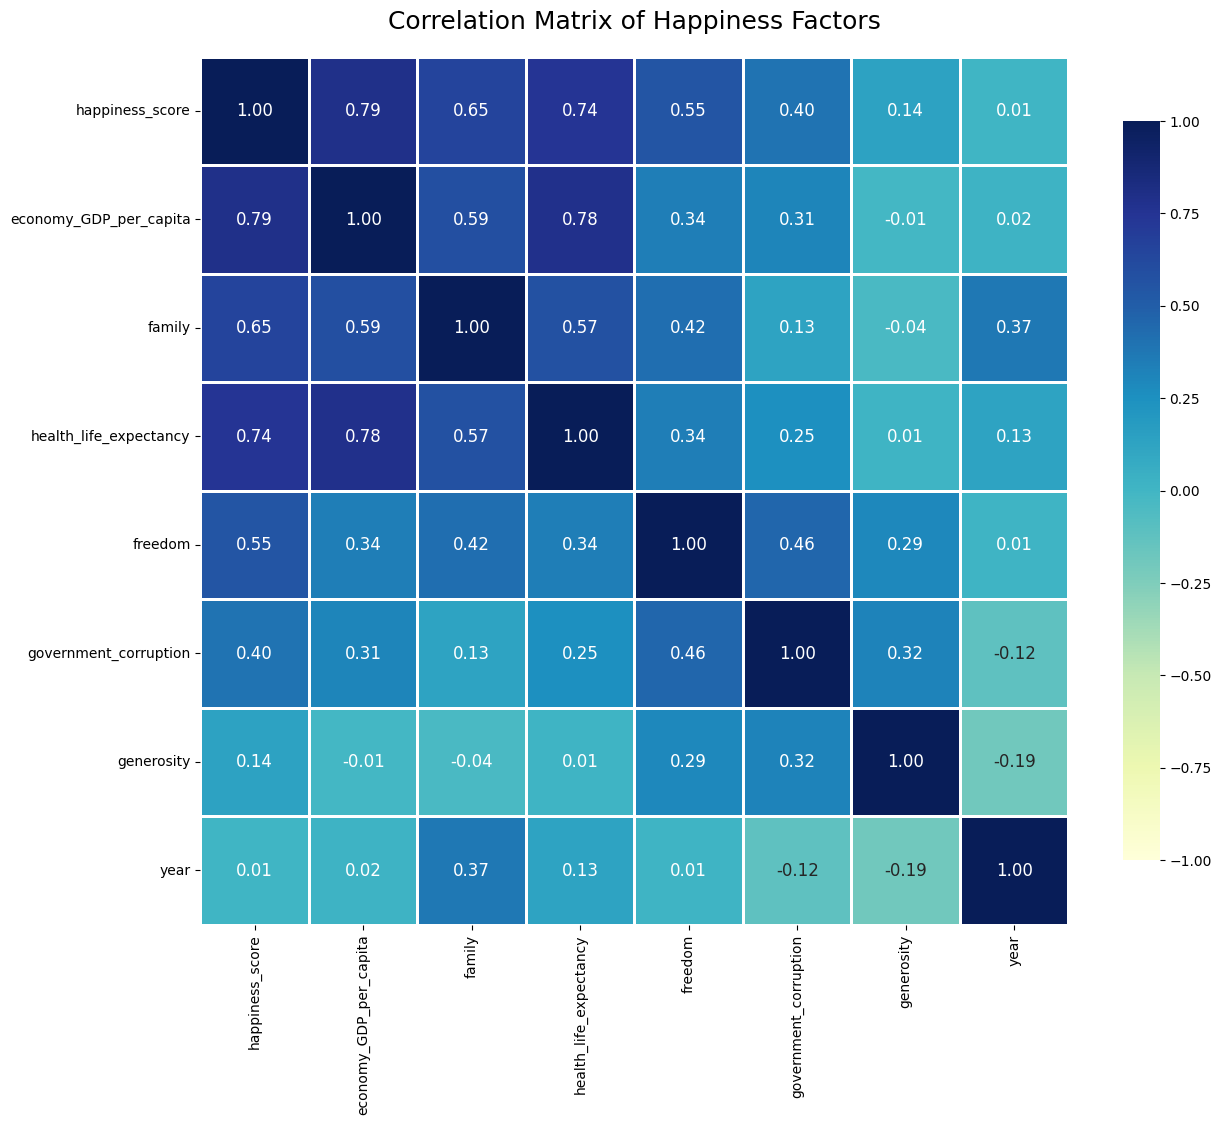

In [5]:
# Columns we want to analyze for their correlation with happiness score
columns_to_analyze = [
    'happiness_score', 
    'economy_GDP_per_capita', 
    'family', 
    'health_life_expectancy', 
    'freedom', 
    'government_corruption', 
    'generosity',
    'year'
]

# Filtering the DataFrame to only include the relevant columns
df_corr = df_concat[columns_to_analyze]

# Calculating the correlation matrix for the selected variables
correlation_matrix = df_corr.corr()

# Set the figure size for better visual presentation
plt.figure(figsize=(14, 12))  # Increase size for a larger, more readable plot

# Create the heatmap with refined style settings
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            linewidths=0.8, linecolor='white', cbar_kws={'shrink': 0.8},
            square=True, vmin=-1, vmax=1, annot_kws={'size': 12},  # Adjust text size for clarity
            cbar=True)  # Show the color bar

# Adding a clear and professional title
plt.title("Correlation Matrix of Happiness Factors", fontsize=18, pad=20)

# Display the plot
plt.show()

## Step 3: Entrenamiento del modelo de machine learning - Encontrando el mejor modelo
- 📚 Import necessary libraries
- 🧹 Handle missing data by filling NaN with the mean of each column
- 🔢 Select features and target variable
- ➕ Add an intercept (bias) to the model
- 📊 Scale features using StandardScaler
- 🔄 Split data into training and test sets
- 🧠 Train the model (Linear Regression, KNN, SVR, Gradient Boosting Regressor)
- 📈 Make predictions on the test data
- 🧮 Calculate R², Adjusted R², AIC, and BIC
- 🧐 Print model summary and evaluation metrics


- Linear Regression Model

In [ ]:
# Select the features (independent variables) and the target variable (dependent variable)
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]  # Features
y = df_concat['happiness_score']  # Target variable

# Add an intercept (bias) term to the model, which is done automatically in R
X = sm.add_constant(X)

# Fill missing values with the mean of each column for both features (X) and target variable (y)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit a linear regression model using statsmodels' Ordinary Least Squares (OLS)
model = sm.OLS(y, X).fit()

# Display the summary of the model, including statistics and coefficients
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.13e-243
Time:                        23:42:05   Log-Likelihood:                -624.54
No. Observations:                 782   AIC:                             1265.
Df Residuals:                     774   BIC:                             1302.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    168

- K-Nearest Neighbors
0.7765

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")




Adjusted R-squared: 0.7520
Approximate AIC: -266.68
Approximate BIC: -239.00


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\3137263161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")


Adjusted R-squared: 0.7765
Approximate AIC: -292.01
Approximate BIC: -267.79


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\2118765270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")


Adjusted R-squared: 0.7122
Approximate AIC: -235.55
Approximate BIC: -221.71


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\2312904719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


- Support Vector Regressor (SVR)

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the SVR model
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust the hyperparameters C and epsilon
model_svr.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")


Support Vector Regressor - R²: 0.7951
Support Vector Regressor - Adjusted R²: 0.7888
Support Vector Regressor - Approximate AIC: -304.35
Support Vector Regressor - Approximate BIC: -276.67


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\2265284347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the SVR model
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust the hyperparameters C and epsilon
model_svr.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\1326516262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Support Vector Regressor - R²: 0.7928
Support Vector Regressor - Adjusted R²: 0.7873
Support Vector Regressor - Approximate AIC: -303.73
Support Vector Regressor - Approximate BIC: -279.51


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the SVR model
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust the hyperparameters C and epsilon
model_svr.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\802064017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Support Vector Regressor - R²: 0.7773
Support Vector Regressor - Adjusted R²: 0.7724
Support Vector Regressor - Approximate AIC: -288.75
Support Vector Regressor - Approximate BIC: -267.99


- Gradient Boosting


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Gradient Boosting Regressor model
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Gradient Boosting Regressor - R²: {r2:.4f}")
print(f"Gradient Boosting Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Gradient Boosting Regressor - Approximate AIC: {aic:.2f}")
print(f"Gradient Boosting Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\3192183085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Gradient Boosting Regressor - R²: 0.7740
Gradient Boosting Regressor - Adjusted R²: 0.7670
Gradient Boosting Regressor - Approximate AIC: -281.35
Gradient Boosting Regressor - Approximate BIC: -253.67


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Gradient Boosting Regressor model
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"Gradient Boosting Regressor - R²: {r2:.4f}")
print(f"Gradient Boosting Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Gradient Boosting Regressor - Approximate AIC: {aic:.2f}")
print(f"Gradient Boosting Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\1343687422.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Gradient Boosting Regressor - R²: 0.7542
Gradient Boosting Regressor - Adjusted R²: 0.7477
Gradient Boosting Regressor - Approximate AIC: -263.61
Gradient Boosting Regressor - Approximate BIC: -239.39


- XGBoost Regressor


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the XGBoost Regressor model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Adjusted R-squared, AIC and BIC approximations
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

# Print the results
print(f"XGBoost Regressor - R²: {r2:.4f}")
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\3545675102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


XGBoost Regressor - R²: 0.7705
XGBoost Regressor - Adjusted R²: 0.7635
XGBoost Regressor - Approximate AIC: -277.75
XGBoost Regressor - Approximate BIC: -250.07


In [ ]:
# Select features and the target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Fill missing values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)  # Replace NaN values in X with the mean of each column
y.fillna(y.mean(), inplace=True)  # Replace NaN values in y with the mean of the target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the XGBoost Regressor model with specified parameters
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)  # Train the model on the training data

# Make predictions and calculate performance metrics
y_pred = model_xgb.predict(X_test)  # Predict happiness_score for the test set
r2 = r2_score(y_test, y_pred)  # Calculate the R² score
mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error

# Calculate Adjusted R², AIC and BIC approximations
n = len(y_test)  # Number of observations in the test set
p = X_train.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))  # Adjusted R² formula
aic = n * np.log(mse) + 2 * (p + 1)  # Approximate AIC
bic = n * np.log(mse) + np.log(n) * (p + 1)  # Approximate BIC

# Print the performance metrics
print(f"XGBoost Regressor - R²: {r2:.4f}")
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")


XGBoost Regressor - R²: 0.7553
XGBoost Regressor - Adjusted R²: 0.7488
XGBoost Regressor - Approximate AIC: -264.61
XGBoost Regressor - Approximate BIC: -240.39


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\3991372907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Select features and the target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy']]  # Features used for prediction
y = df_concat['happiness_score']  # Target variable (happiness score)

# Fill missing values (NaN) in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)  # Replace missing values in X with the column mean
y.fillna(y.mean(), inplace=True)  # Replace missing values in y with the column mean

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the XGBoost Regressor model with the specified parameters
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # Initialize model
model_xgb.fit(X_train, y_train)  # Train the model on the training set

# Make predictions and compute the performance metrics
y_pred = model_xgb.predict(X_test)  # Predict the happiness scores for the test set
r2 = r2_score(y_test, y_pred)  # Calculate the R² score
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error (MSE)

# Calculate the Adjusted R², AIC, and BIC approximations
n = len(y_test)  # Number of observations in the test set
p = X_train.shape[1]  # Number of features in the training set
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))  # Adjusted R² formula
aic = n * np.log(mse) + 2 * (p + 1)  # Approximate AIC (Akaike Information Criterion)
bic = n * np.log(mse) + np.log(n) * (p + 1)  # Approximate BIC (Bayesian Information Criterion)

# Print the calculated metrics
print(f"XGBoost Regressor - R²: {r2:.4f}")  # Print R² score
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")  # Print Adjusted R²
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")  # Print Approximate AIC
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")  # Print Approximate BIC


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\684940806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


XGBoost Regressor - R²: 0.6903
XGBoost Regressor - Adjusted R²: 0.6863
XGBoost Regressor - Approximate AIC: -215.32
XGBoost Regressor - Approximate BIC: -201.48


## Step 4:Support Vector Regressor (SVR) is the Best Model and We Will Attempt to Improve It - Best Option 0.7951
- 🚀 **Improve R²**  
  - **Feature Scaling** with **StandardScaler**.
  - **Advanced Hyperparameter Tuning** with **Grid Search** or **Randomized Search**.
  - **Hyperparameter Optimization**.
  - **Feature Standardization**.

- 💾 **Model and Scaler Export**  
  - The trained model and scaler were exported as `.pkl` files.


- Standardization of Characteristics 

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search (with only 3 values per parameter)
param_grid = {
    'C': [0.1, 1, 10],                 # Values for C
    'epsilon': [0.01, 0.1, 0.5],       # Values for epsilon
    'kernel': ['rbf', 'linear'],       # Types of kernel
    'gamma': ['scale', 'auto', 0.1]    # Values for gamma
}

# Create the SVR model
svr = SVR()

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_svr = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_best = best_svr.predict(X_test)

# Evaluate the model
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print the results
print(f"Optimized SVR (GridSearch) - R² Score: {r2_best:.4f}")
print(f"Optimized SVR (GridSearch) - Mean Squared Error: {mse_best:.4f}")
print(f"Optimized SVR (GridSearch) - Mean Absolute Error: {mae_best:.4f}")


Support Vector Regressor - R²: 0.7951
Support Vector Regressor - Mean Squared Error: 0.2558
Support Vector Regressor - Mean Absolute Error: 0.3872


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\1073684780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


- Hyperparameter Optimization

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search (with only 3 values per parameter)
param_grid = {
    'C': [0.1, 1, 10],                 # Values for C
    'epsilon': [0.01, 0.1, 0.5],       # Values for epsilon
    'kernel': ['rbf', 'linear'],       # Types of kernel
    'gamma': ['scale', 'auto', 0.1]    # Values for gamma
}

# Create the SVR model
svr = SVR()

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_svr = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_best = best_svr.predict(X_test)

# Evaluate the model
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print the results
print(f"Optimized SVR (GridSearch) - R² Score: {r2_best:.4f}")
print(f"Optimized SVR (GridSearch) - Mean Squared Error: {mse_best:.4f}")
print(f"Optimized SVR (GridSearch) - Mean Absolute Error: {mae_best:.4f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\310916557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Mejores parámetros encontrados: {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
SVR optimizado (GridSearch) - R² Score: 0.8087
SVR optimizado (GridSearch) - Mean Squared Error: 0.2389
SVR optimizado (GridSearch) - Mean Absolute Error: 0.3673


 
- Advanced Hyperparameter Tuning (Grid Search or Randomized Search)

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define parameters for the random search (with a reduced search space)
param_dist = {
    'C': np.logspace(-1, 1, 3),         # Reduce to 3 values
    'epsilon': np.linspace(0.1, 0.3, 3), # Reduce to 3 values
    'kernel': ['rbf'],                   # Keep only one kernel
    'gamma': ['scale', 0.1]              # Reduce to 2 values
}

# Create the SVR model
svr = SVR()

# Perform the random search with cross-validation (using 3 folds)
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params_random = random_search.best_params_
print(f"Best parameters found with RandomizedSearchCV: {best_params_random}")

# Train the model with the best parameters
best_svr_random = random_search.best_estimator_

# Make predictions with the optimized model
y_pred_best_random = best_svr_random.predict(X_test)

# Evaluate the optimized model
r2_best_random = r2_score(y_test, y_pred_best_random)
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)

# Print the evaluation results
print(f"Optimized SVR (RandomizedSearch) - R² Score: {r2_best_random:.4f}")
print(f"Optimized SVR (RandomizedSearch) - Mean Squared Error: {mse_best_random:.4f}")
print(f"Optimized SVR (RandomizedSearch) - Mean Absolute Error: {mae_best_random:.4f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\1298486039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
c:\Users\NITRO 5\Desktop\Workshop-003-ETL\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados con RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': np.float64(0.3), 'C': np.float64(10.0)}
SVR optimizado (RandomizedSearch) - R² Score: 0.7608
SVR optimizado (RandomizedSearch) - Mean Squared Error: 0.2987
SVR optimizado (RandomizedSearch) - Mean Absolute Error: 0.4186


- StandardScaler Feature Scaling

In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform on the features

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Create the SVR model with specified hyperparameters
model_svr = SVR(kernel='rbf', C=10, epsilon=0.1)

# Train the model on the training data
model_svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_svr.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)  # R-squared score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the evaluation results
print(f"SVR with StandardScaler - R² Score: {r2:.4f}")
print(f"SVR with StandardScaler - Mean Squared Error: {mse:.4f}")
print(f"SVR with StandardScaler - Mean Absolute Error: {mae:.4f}")


SVR con StandardScaler - R² Score: 0.8085
SVR con StandardScaler - Mean Squared Error: 0.2391
SVR con StandardScaler - Mean Absolute Error: 0.3679


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\1386675385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



- Cross Validation


In [ ]:
# Select features and target variable
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 
               'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Fill NaN values in X and y with the mean of each column
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test_scaled = scaler.transform(X_test)  # Transform on the test set using the already fitted scaler

# Create the SVR model with specified hyperparameters
model_svr = SVR(kernel='rbf', C=10, epsilon=0.1)

# Perform cross-validation with 5 folds and calculate R² on the training set
cv_scores_r2 = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring='r2')

# Perform cross-validation with 5 folds and calculate MSE (negative because cross_val_score returns negative values for MSE)
cv_scores_mse = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation with 5 folds and calculate MAE
mae_scorer = make_scorer(mean_absolute_error)
cv_scores_mae = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring=mae_scorer)

# Get the index of the fold with the highest R² score
best_r2_index = np.argmax(cv_scores_r2)
best_r2 = cv_scores_r2[best_r2_index]
best_mse = cv_scores_mse[best_r2_index]
best_mae = cv_scores_mae[best_r2_index]

# Print results for the best fold
print(f"\nBest fold according to R²:")
print(f"R²: {best_r2:.4f}")
print(f"MSE (negative): {best_mse:.4f}")
print(f"MAE: {best_mae:.4f}")

# Train the SVR model on the entire training set (to export it)
model_svr.fit(X_train_scaled, y_train)

# Save the trained model as a .pkl file
model_path = '../models/svr_model_cross_val.pkl'
dump(model_svr, model_path)
print(f"\nSVR model exported as {model_path}")

# Save the fitted scaler as a .pkl file
scaler_path = '../models/scaler.pkl'
dump(scaler, scaler_path)
print(f"Scaler exported as {scaler_path}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21904\2669208158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



Mejor fold según R²:
R²: 0.8321
MSE (negativo): -0.2198
MAE: 0.3728

Modelo SVR exportado como ../models/svr_model_cross_val.pkl
Escalador exportado como ../models/scaler.pkl
